> Note: For best results, download the file as ipynb and run it on your pc, Kaggle storage and memory limitations limit the output accuracies.
> > https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

## Importing the libraries and dataset

In [1]:
import matplotlib.pyplot as plt  # collection of command style functions that make matplotlib work like MATLAB
import seaborn as sns  # statistical data visualization
import numpy as np
# data analysis
import pandas as pd  
import numpy as np  

import warnings  
# Base category for warnings triggered during the process of importing a 
# module (ignored by default)
warnings.filterwarnings('ignore')  
# here we prescribe the action in case of an error.

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset_url = '/kaggle/input/breast-cancer-wisconsin-data/data.csv'

# Read the dataset CSV into a pandas DataFrame
df = pd.read_csv(dataset_url)

## Data exploration

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
print('Number of Examples = ', df.shape[0])

Number of Examples =  569


In [5]:
print("\nColumn Labels:")
print(df.columns)


Column Labels:
Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.describe(include=np.number)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.shape

(569, 33)

## Dropping the NaN column:

In [9]:
df.dropna(axis=1, inplace=True)  # Drops columns with NaN values in-place

# Now 'df' contains only columns with no NaN values, axis=1 for cols,or rows would've happened

### Verifying dropped column

In [10]:
df.shape

(569, 32)

In [11]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
513,915940,B,14.58,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,...,16.76,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048
478,911685,B,11.49,14.59,73.99,404.9,0.10460,0.08228,0.05308,0.019690,...,12.40,21.90,82.04,467.6,0.1352,0.2010,0.2596,0.07431,0.2941,0.09180
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,...,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.25420,0.2929,0.09873
481,91227,B,13.90,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.020700,...,16.41,26.42,104.40,830.5,0.1064,0.1415,0.1673,0.08150,0.2356,0.07603
398,904302,B,11.06,14.83,70.31,378.2,0.07741,0.04768,0.02712,0.007246,...,12.68,20.35,80.79,496.7,0.1120,0.1879,0.2079,0.05556,0.2590,0.09158


## Dealing with missing data

In [12]:
def display_missing(dfs):
    for df in dfs:
        for col in df.columns.tolist():
            print(col, "column missing values:", df[col].isnull().sum())
        print('\n')

# Assuming 'df' is your DataFrame
display_missing([df])


id column missing values: 0
diagnosis column missing values: 0
radius_mean column missing values: 0
texture_mean column missing values: 0
perimeter_mean column missing values: 0
area_mean column missing values: 0
smoothness_mean column missing values: 0
compactness_mean column missing values: 0
concavity_mean column missing values: 0
concave points_mean column missing values: 0
symmetry_mean column missing values: 0
fractal_dimension_mean column missing values: 0
radius_se column missing values: 0
texture_se column missing values: 0
perimeter_se column missing values: 0
area_se column missing values: 0
smoothness_se column missing values: 0
compactness_se column missing values: 0
concavity_se column missing values: 0
concave points_se column missing values: 0
symmetry_se column missing values: 0
fractal_dimension_se column missing values: 0
radius_worst column missing values: 0
texture_worst column missing values: 0
perimeter_worst column missing values: 0
area_worst column missing val

## X and y

In [13]:
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

## Encoding categorical y

In [14]:
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
le = LabelEncoder()

# Encode the target variable 'y'
y = le.fit_transform(y)

# Update the 'Column2' with the encoded values
df['diagnosis'] = y


### Verifying y

In [15]:
pd.DataFrame(y)

,0
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [16]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
87,86135502,1,19.02,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.08271,...,24.56,30.41,152.90,1623.0,0.1249,0.3206,0.5755,0.19560,0.3956,0.09288
411,905520,0,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.1067,0.07431,0.2998,0.07881
440,909411,0,10.97,17.20,71.73,371.5,0.08915,0.11130,0.09457,0.03613,...,12.36,26.87,90.14,476.4,0.1391,0.4082,0.4779,0.15550,0.2540,0.09532
370,9012315,1,16.35,23.29,109.00,840.4,0.09742,0.14970,0.18110,0.08773,...,19.38,31.03,129.30,1165.0,0.1415,0.4665,0.7087,0.22480,0.4824,0.09614
369,9012000,1,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,...,27.66,25.80,195.00,2227.0,0.1294,0.3885,0.4756,0.24320,0.2741,0.08574


## Counting the y-values

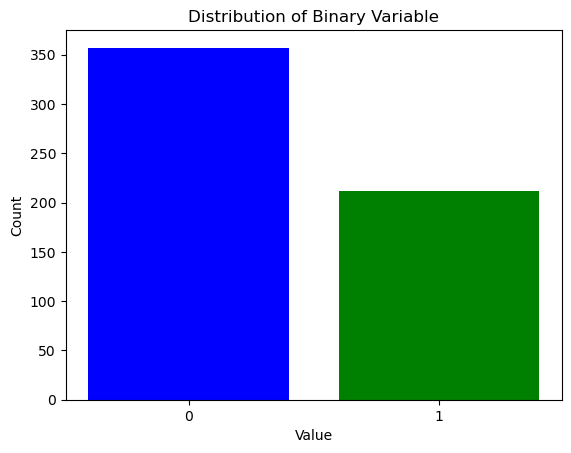

In [17]:
# Count the occurrences of each value
count_0 = np.count_nonzero(y == 0)
count_1 = np.count_nonzero(y == 1)

# Set up the plot
fig, ax = plt.subplots()
ax.bar([0, 1], [count_0, count_1], tick_label=["0", "1"], color=["blue", "green"])

# Add labels and title
ax.set_xlabel("Value")
ax.set_ylabel("Count")
ax.set_title("Distribution of Binary Variable")

plt.show()

In [18]:
# benign (B) values
(y == 0).sum()

357

In [19]:
# malignant (M) values
(y == 1).sum()

212

> This indicates imbalanced output, which would require RegularizedSearchCV later in hyperparameter tuning

## Correlation Matrix and Heatmap

In [20]:
correlation_matrix = df.corr()
correlation_matrix


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.039769,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661


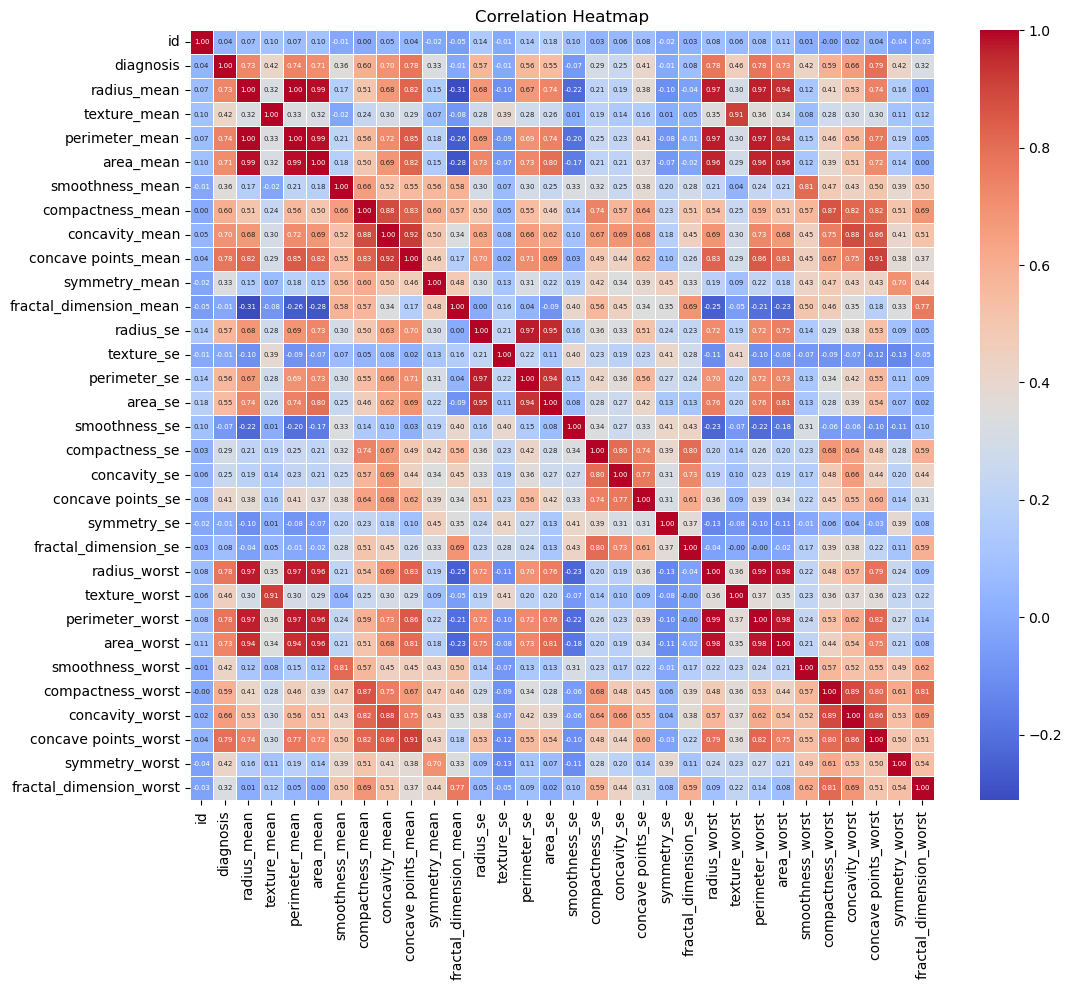

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))

plt.title("Correlation Heatmap")
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot_kws={"fontsize": 5})

plt.show()


# *These can be used for feature engineering*

# **Feature Engineering: Coming soon**

## Splitting the dataset into train and test set

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [23]:
pd.DataFrame(X_train).sample(5)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
336,11.47,16.03,73.02,402.7,0.09076,0.05886,0.025870,0.02322,0.1634,0.06372,...,12.51,20.79,79.67,475.8,0.15310,0.11200,0.09823,0.06548,0.2851,0.08763
57,11.08,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.02583,0.1566,0.06669,...,11.35,16.82,72.01,396.5,0.12160,0.08240,0.03938,0.04306,0.1902,0.07313
60,12.40,17.68,81.47,467.8,0.10540,0.13160,0.077410,0.02799,0.1811,0.07102,...,12.88,22.91,89.61,515.8,0.14500,0.26290,0.24030,0.07370,0.2556,0.09359
67,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.06637,0.1428,0.05313,...,27.90,45.41,180.20,2477.0,0.14080,0.40970,0.39950,0.16250,0.2713,0.07568
341,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028


## Feature scaling

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
X_train

array([[-0.23782661,  1.37654662, -0.30376777, ..., -0.83797784,
        -0.73208985, -0.93800715],
       [-0.64940413, -1.06442136, -0.6200611 , ..., -0.14149333,
        -0.48181078,  0.83889934],
       [-0.36661957, -0.5998053 , -0.36832572, ..., -0.52605064,
         0.24869124,  0.07892833],
       ...,
       [-0.5766081 ,  2.06538039, -0.60138396, ..., -0.66809984,
        -0.72739711, -0.12974752],
       [-0.27422462, -0.82864605, -0.24164597, ..., -0.64256463,
         0.42545083, -0.13607103],
       [-0.08103517, -1.39265759, -0.14298194, ..., -0.86901766,
        -0.13924131, -0.93455796]])

In [26]:
X_test

array([[-0.51221162,  0.0612902 , -0.52951757, ..., -0.10479601,
        -0.38169915, -0.14124481],
       [-0.1482315 , -1.93124238, -0.14907232, ..., -0.62360434,
        -0.3160009 , -0.70633672],
       [ 0.14575244, -1.3025082 ,  0.10997151, ..., -0.35158547,
        -0.44739741, -0.78854235],
       ...,
       [-1.33396673, -1.24703166, -1.28391167, ..., -0.64577564,
         1.20288017,  0.32324579],
       [ 0.61052705, -0.1213201 ,  0.69911352, ...,  0.8921478 ,
        -0.22214625,  1.27062265],
       [-0.68860198, -0.21609253, -0.71872513, ..., -0.48889461,
         0.46612118, -0.3200277 ]])

# Part 2: Building the model

## 1) Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
classifier_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [28]:
y_pred = classifier_lr.predict(X_test)

### Testing the prediction scores

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

In [30]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)


results = pd.DataFrame([['Logistic Regression', acc, f1, prec, rec]],
               columns = ['Model', 'Accuracy', 'F1 Score', 'Precision', 'Recall'])

In [31]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[105   0]
 [  5  61]]


In [32]:
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.97076,0.96063,1.0,0.924242


### Cross Validation

In [33]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_lr, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 97.74 %
Standard Deviation is 2.62 %


## 2) Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=0)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [35]:
y_pred = classifier_rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.970760,0.960630,1.000000,0.924242
1,Random Forest,0.953216,0.938462,0.953125,0.924242


In [36]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[102   3]
 [  5  61]]


### Cross validation

In [37]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_rf, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 95.49 %
Standard Deviation is 3.50 %


## 3) XGBoost

In [38]:
from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(random_state=0)
classifier_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [39]:
y_pred = classifier_xgb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['XGBoost', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.970760,0.960630,1.000000,0.924242
1,Random Forest,0.953216,0.938462,0.953125,0.924242
2,XGBoost,0.935673,0.916031,0.923077,0.909091


In [40]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[100   5]
 [  6  60]]


### Cross validation

In [41]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier_xgb, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 95.49 %
Standard Deviation is 2.45 %


# **Part 3: Randomized Search to find the best parameters (Logistic regression)**

Here's a table summarizing common scoring metrics used in classification tasks, along with their brief intuition and use cases:

| Metric                  | Intuition                                           | Use Cases                                                  |
|-------------------------|----------------------------------------------------|------------------------------------------------------------|
| Accuracy                | Ratio of correct predictions to total instances   | Balanced datasets, general classification accuracy        |
| Precision               | Ratio of correct positive predictions to all positives | Cases where false positives are costly                  |
| Recall (Sensitivity)   | Ratio of correct positive predictions to actual positives | Cases where false negatives are costly                  |
| F1-Score                | Harmonic mean of precision and recall             | Balancing precision and recall, considering both errors  |
| Specificity             | Ratio of correct negative predictions to actual negatives | When the cost of false positives is high               |
| ROC-AUC                 | Area under ROC curve; TP rate vs. FP rate        | Evaluating models across different threshold settings   |
| Log Loss (Cross-Entropy)| Measures the difference between predicted and true class probabilities | Models providing probabilistic predictions         |
| Matthews Correlation Coefficient (MCC) | Incorporates true positives, true negatives, false positives, and false negatives | Imbalanced datasets, different class sizes         |
| Cohen's Kappa           | Measures agreement between observed and expected classification | Assessing agreement between human raters           |
| Balanced Accuracy       | Average recall for each class                    | Imbalanced datasets, providing balanced view of performance |



Here's a comparative analysis of different types of hyperparameter search techniques, along with a brief explanation of each technique:

| Search Technique         | Intuition and Approach                                  | Pros                                               | Cons                                               |
|--------------------------|--------------------------------------------------------|----------------------------------------------------|----------------------------------------------------|
| Grid Search              | Exhaustively searches over a predefined parameter grid | Simple to implement                               | Computationally expensive for large parameter grids; May not explore parameter interactions thoroughly |
| Random Search            | Randomly samples from parameter distributions          | More efficient than grid search for large grids; Can discover unexpected parameter combinations | Less systematic than grid search; Might miss optimal values near searched points |
| Bayesian Optimization   | Models the objective function and selects promising points to explore | Efficient for high-dimensional spaces; Adapts to optimization landscape | Requires some understanding of model choice; Initialization can affect results |
| Hyperband                | Balances random search with early stopping            | Efficient in terms of computational resources; Can quickly discard poor-performing configurations | Parameter tuning might be needed for optimal performance; Sensitivity to initial budget setting |
| Genetic Algorithms       | Uses evolutionary principles to evolve parameter sets  | Can handle complex optimization landscapes; Potential for discovering non-linear solutions | Can be computationally expensive; Might require fine-tuning of algorithm parameters |
| Particle Swarm Optimization | Simulates particles moving through a parameter space | Can explore parameter space globally; Adapts to non-linear optimization | Convergence might be slow; Sensitive to algorithm settings |
| Simulated Annealing     | Inspired by annealing process, explores gradually decreasing temperature | Can escape local optima; Gradual exploration can help find global solutions | Convergence might be slow; Requires temperature tuning |
| Population-based Training | Optimizes multiple configurations in parallel using different worker models | Efficient for resource utilization; Considers multiple solutions simultaneously | Requires careful balancing of resources; Complexity in managing population |
| Tree-structured Parzen Estimators (TPE) | Models the target metric's distribution and explores accordingly | Efficient for high-dimensional search spaces; Can adapt to varying parameter importance | Requires careful choice of parameter priors; Complex model tuning |


In [42]:
from sklearn.model_selection import RandomizedSearchCV

In [43]:
parameters = [
              {'penalty':['l1', 'l2', 'elasticnet', 'none'],
               'C':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
               'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
               }
              ]

In [44]:
randomized_search = RandomizedSearchCV(estimator = classifier_lr, param_distributions = parameters,
                                 n_iter = 5, scoring='roc_auc', n_jobs = -1, cv = 5, verbose=3)

# cv: cross-validation
# n_jobs = -1:
# Number of jobs to run in parallel. -1 means using all processors

In [45]:
randomized_search.fit(X_train, y_train)

randomized_search.best_estimator_

randomized_search.best_params_

randomized_search.best_score_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


0.9953268424611224

The randomized search will give {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
But on kaggle, it's giving something else due to resource limitations.

# Part 4: Final Model (Logistic regression)

In [46]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
classifier.fit(X_train, y_train)

LogisticRegression(C=0.5, random_state=0)

In [47]:
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Final Logistic regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])


results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,F1 Score,Precision,Recall
0,Logistic Regression,0.970760,0.960630,1.000000,0.924242
1,Random Forest,0.953216,0.938462,0.953125,0.924242
2,XGBoost,0.935673,0.916031,0.923077,0.909091
3,Final Logistic regression,0.970760,0.960630,1.000000,0.924242


In [48]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print("Accuracy is {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation is {:.2f} %".format(accuracies.std()*100))

Accuracy is 97.99 %
Standard Deviation is 1.87 %
